<a href="https://colab.research.google.com/github/samteccmrj/neurocienciadoconsumo/blob/main/neurociencia_do_consumo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bloco 1 — Carregar dados e selecionar as 7 questões Likert

import pandas as pd

file_path = "neurociencia_do_consumo_preteste.xlsx"
sheet_name = "Respostas ao formulário 1"

df_raw = pd.read_excel(file_path, sheet_name=sheet_name)

# Colunas da escala Likert
likert_cols = [
    "1. Quando vejo uma promoção relâmpago de algo que eu preciso, sempre pesquiso os preços em outras lojas antes de comprar.",
    "2. Não realizo compras com frequência.",
    "3. Sempre verifico se a marca faz testes em animais ou tem práticas éticas de produção.",
    "4. Sempre considero se o produto é biodegradável ou reciclável na hora da compra.",
    "5. A presença de plásticos em produtos ou em embalagens afeta a minha decisão de compra.",
    "6. A durabilidade do produto é um fator importante na minha decisão de compra.",
    "7. Costumo pensar no impacto da indústria da moda (poluição, trabalho escravo, desperdício) na hora da compra.",
]

# Selecionar as colunas Likert
df_likert = df_raw[likert_cols].copy()

# Garantir que sejam numéricas
for c in likert_cols:
    df_likert[c] = pd.to_numeric(df_likert[c], errors="coerce")

# Remover respostas vazias
df_likert = df_likert.dropna().reset_index(drop=True)

print("Formato da base Likert:", df_likert.shape)
df_likert.head()

Formato da base Likert: (28, 7)


,"1. Quando vejo uma promoção relâmpago de algo que eu preciso, sempre pesquiso os preços em outras lojas antes de comprar.",2. Não realizo compras com frequência.,3. Sempre verifico se a marca faz testes em animais ou tem práticas éticas de produção.,4. Sempre considero se o produto é biodegradável ou reciclável na hora da compra.,5. A presença de plásticos em produtos ou em embalagens afeta a minha decisão de compra.,6. A durabilidade do produto é um fator importante na minha decisão de compra.,"7. Costumo pensar no impacto da indústria da moda (poluição, trabalho escravo, desperdício) na hora da compra."
0,4,4,3,2,2,5,2
1,4,5,2,4,3,5,2
2,5,3,2,4,3,5,4
3,5,4,5,3,2,4,2
4,5,3,2,2,1,5,2


In [ ]:
df_likert

,"1. Quando vejo uma promoção relâmpago de algo que eu preciso, sempre pesquiso os preços em outras lojas antes de comprar.",2. Não realizo compras com frequência.,3. Sempre verifico se a marca faz testes em animais ou tem práticas éticas de produção.,4. Sempre considero se o produto é biodegradável ou reciclável na hora da compra.,5. A presença de plásticos em produtos ou em embalagens afeta a minha decisão de compra.,6. A durabilidade do produto é um fator importante na minha decisão de compra.,"7. Costumo pensar no impacto da indústria da moda (poluição, trabalho escravo, desperdício) na hora da compra."
0,4,4,3,2,2,5,2
1,4,5,2,4,3,5,2
2,5,3,2,4,3,5,4
3,5,4,5,3,2,4,2
4,5,3,2,2,1,5,2
5,5,2,3,1,1,5,2
6,5,5,4,4,5,5,4
7,5,5,3,3,2,5,3
8,4,5,1,2,1,5,2
9,5,2,3,3,1,5,3


In [ ]:
# Bloco 2 — Normalização dos dados

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(df_likert.values)

# MinMaxScaler (0 a 1)
mm_scaler = MinMaxScaler()
X_minmax = mm_scaler.fit_transform(df_likert.values)

print("StandardScaler → média:", X_std.mean(axis=0).round(3),
      " | desvio:", X_std.std(axis=0).round(3))

print("MinMaxScaler → min:", X_minmax.min(axis=0),
      " | max:", X_minmax.max(axis=0))


StandardScaler → média: [ 0.  0. -0. -0. -0.  0. -0.]  | desvio: [1. 1. 1. 1. 1. 1. 1.]
MinMaxScaler → min: [0. 0. 0. 0. 0. 0. 0.]  | max: [1. 1. 1. 1. 1. 1. 1.]


k=2 → Silhueta=0.171
k=3 → Silhueta=0.189
k=4 → Silhueta=0.196
k=5 → Silhueta=0.210
k=6 → Silhueta=0.203


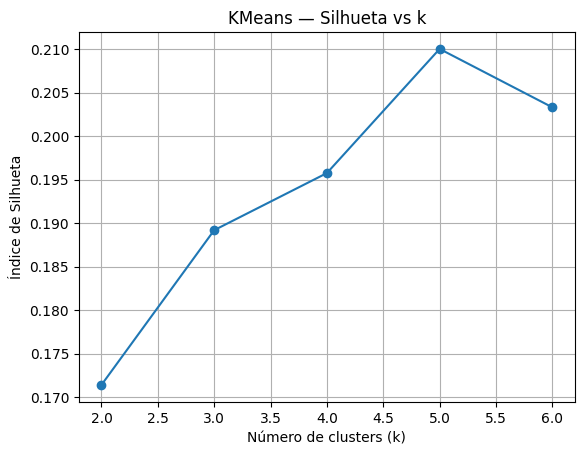

In [ ]:
# Bloco 3 — Clusterização (KMeans) e Índice de Silhueta

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = X_std

ks = [2, 3, 4, 5, 6]
sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Mostrar resultados
for k, s in zip(ks, sil_scores):
    print(f"k={k} → Silhueta={s:.3f}")

# Gráfico
plt.plot(ks, sil_scores, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Índice de Silhueta")
plt.title("KMeans — Silhueta vs k")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Rodar KMeans com k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_std)

# Criar DataFrame com clusters
df_clusters = df_likert.copy()
df_clusters["cluster"] = labels

# Renomear colunas para números (1 a 7)
df_numeric = df_clusters.rename(columns={old: str(i+1) for i, old in enumerate(df_likert.columns)})

# Calcular médias por cluster
cluster_means = df_numeric.groupby("cluster").mean().round(2)

# Mostrar em formato de tabela linear
print("=== Médias das respostas Likert por cluster ===\n")
print(cluster_means)

print("\n=== Distribuição de participantes por cluster ===\n")
print(df_numeric["cluster"].value_counts().sort_index())

=== Médias das respostas Likert por cluster ===

            1     2     3     4     5     6     7
cluster                                          
0        5.00  2.40  2.20  1.60  1.00  5.00  2.20
1        3.20  3.40  1.40  1.40  1.40  4.00  2.20
2        3.33  3.33  2.33  1.00  1.00  5.00  4.33
3        4.50  4.33  2.33  2.42  2.08  4.92  2.42
4        5.00  4.00  3.00  3.67  4.00  5.00  4.33

=== Distribuição de participantes por cluster ===

cluster
0     5
1     5
2     3
3    12
4     3
Name: count, dtype: int64


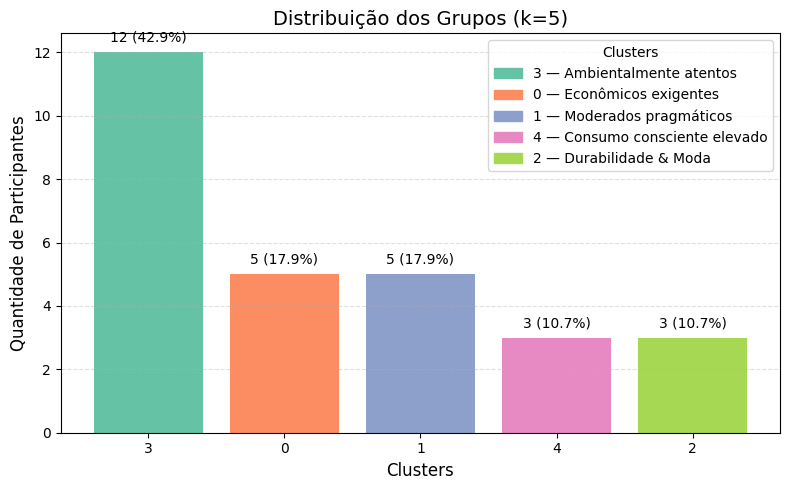

In [ ]:
# Gráfico de distribuição dos clusters (k=5, ordenado do maior para o menor)

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Novos nomes dos clusters (interpretação pelas médias)
cluster_names = {
    0: "Econômicos exigentes",
    1: "Moderados pragmáticos",
    2: "Durabilidade & Moda",
    3: "Ambientalmente atentos",
    4: "Consumo consciente elevado",
}

# Contagem por cluster
counts = df_numeric["cluster"].value_counts().sort_values(ascending=False)  # ordenado
clusters = counts.index.to_list()
values = counts.values
total = values.sum()

# Paleta de cores (1 cor por cluster)
colors = plt.cm.Set2.colors  # boas cores distintas
colors = colors[:len(clusters)]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(range(len(clusters)), values, color=colors)

# Eixos e título
ax.set_title("Distribuição dos Grupos (k=5)", fontsize=14)
ax.set_xlabel("Clusters", fontsize=12)
ax.set_ylabel("Quantidade de Participantes", fontsize=12)
ax.set_xticks(range(len(clusters)))
ax.set_xticklabels([f"{c}" for c in clusters], fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# Rótulos sobre as barras (n e %)
for i, v in enumerate(values):
    ax.text(i, v + max(values)*0.02, f"{v} ({v/total:.1%})",
            ha="center", va="bottom", fontsize=10)

# Legenda com nomes + cores
legend_labels = [f"{c} — {cluster_names.get(c, f'Grupo {c}')}" for c in clusters]
legend_handles = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(clusters))]
ax.legend(handles=legend_handles, title="Clusters", loc="best")

plt.tight_layout()
plt.show()


In [ ]:
df_pre_media

,Endereço de e-mail,media_pre
0,voluntario@01,3.143
1,voluntario@02,3.571
2,voluntario@03,3.714
3,voluntario@04,3.571
4,voluntario@05,2.857
5,voluntario@06,2.714
6,voluntario@07,4.571
7,voluntario@08,3.714
8,voluntario@09,2.857
9,voluntario@10,3.143


In [ ]:
import pandas as pd

# ===== CONFIG BÁSICA =====
post_path = "neurociencia_do_consumo_posteste.xlsx"
sheet     = "Respostas do Formulário 1"
id_col    = "Endereço de email"

likert_cols = [
    "1. Quando vejo uma promoção relâmpago de algo que eu preciso, sempre pesquiso os preços em outras lojas antes de comprar.",
    "2. Não realizo compras com frequência.",
    "3. Sempre verifico se a marca faz testes em animais ou tem práticas éticas de produção.",
    "4. Sempre considero se o produto é biodegradável ou reciclável na hora da compra.",
    "5. A presença de plásticos em produtos ou em embalagens afeta a minha decisão de compra.",
    "6. A durabilidade do produto é um fator importante na minha decisão de compra.",
    "7. Costumo pensar no impacto da indústria da moda (poluição, trabalho escravo, desperdício) na hora da compra.",
]

# Ler pós
df_post = pd.read_excel(post_path, sheet_name=sheet).copy()

# Normalizar ID (e-mail)
df_post[id_col] = df_post[id_col].astype(str).str.strip().str.lower()

# Manter apenas ID + Likert
df_post_sel = df_post[[id_col] + likert_cols].copy()

# Converter para numérico e filtrar respostas completas
for c in likert_cols:
    df_post_sel[c] = pd.to_numeric(df_post_sel[c], errors="coerce")

df_post_clean = df_post_sel.dropna(subset=likert_cols).drop_duplicates(subset=[id_col]).reset_index(drop=True)

# Média Likert do pós por participante
df_post_media = df_post_clean[[id_col]].copy()
df_post_media["media_post"] = df_post_clean[likert_cols].mean(axis=1).round(3)

print("Prévia (pós, média Likert):")
display(df_post_media.head())
print("Total no pós com respostas válidas:", len(df_post_media))

Prévia (pós, média Likert):


,Endereço de email,media_post
0,voluntario@01,4.000
1,voluntario@02,4.286
2,voluntario@03,3.857
3,voluntario@04,3.143
4,voluntario@05,3.000


Total no pós com respostas válidas: 28


In [ ]:
df_post_media

,Endereço de email,media_post
0,voluntario@01,4.000
1,voluntario@02,4.286
2,voluntario@03,3.857
3,voluntario@04,3.143
4,voluntario@05,3.000
5,voluntario@06,3.000
6,voluntario@07,4.857
7,voluntario@08,4.000
8,voluntario@09,2.857
9,voluntario@10,2.857


In [ ]:
# Pré 0 — Criar df_pre_sel (ID + 7 itens Likert) a partir do arquivo de PRÉ

import pandas as pd
import re
import unicodedata

# ====== CONFIG: ajuste se os nomes/paths forem diferentes ======
pre_path = "neurociencia_do_consumo_preteste.xlsx"
sheet    = "Respostas ao formulário 1"

# As 7 perguntas (exatamente como no arquivo)
likert_cols = [
    "1. Quando vejo uma promoção relâmpago de algo que eu preciso, sempre pesquiso os preços em outras lojas antes de comprar.",
    "2. Não realizo compras com frequência.",
    "3. Sempre verifico se a marca faz testes em animais ou tem práticas éticas de produção.",
    "4. Sempre considero se o produto é biodegradável ou reciclável na hora da compra.",
    "5. A presença de plásticos em produtos ou em embalagens afeta a minha decisão de compra.",
    "6. A durabilidade do produto é um fator importante na minha decisão de compra.",
    "7. Costumo pensar no impacto da indústria da moda (poluição, trabalho escravo, desperdício) na hora da compra.",
]

# ====== helpers ======
def strip_accents(s: str) -> str:
    return ''.join(ch for ch in unicodedata.normalize('NFKD', str(s)) if not unicodedata.combining(ch))

def find_id_col(df: pd.DataFrame) -> str:
    candidates_exact = [
        "Endereço de e-mail", "Endereço de email", "email", "e-mail",
        "Email", "E-mail", "Endereço de Email", "Endereço de E-mail"
    ]
    for cand in candidates_exact:
        if cand in df.columns:
            return cand
    norm = {c: re.sub(r'[^a-z]', '', strip_accents(str(c)).lower()) for c in df.columns}
    for c, cn in norm.items():
        if "email" in cn:
            return c
    raise KeyError("Não encontrei coluna de ID (email). Colunas disponíveis: " + ", ".join(map(str, df.columns)))

# ====== carregar PRÉ (ou reaproveitar se já existir df_pre) ======
if "df_pre" in globals() and isinstance(df_pre, pd.DataFrame):
    pre_df = df_pre.copy()
else:
    pre_df = pd.read_excel(pre_path, sheet_name=sheet)

# detectar ID
id_col = find_id_col(pre_df)

# checar se todas as 7 questões existem
missing = [c for c in likert_cols if c not in pre_df.columns]
if missing:
    raise KeyError("As colunas Likert abaixo não foram encontradas no PRÉ:\n- " + "\n- ".join(missing))

# montar df_pre_sel: ID + 7 itens
df_pre_sel = pre_df[[id_col] + likert_cols].copy()

print("df_pre_sel criado com as colunas:")
print([id_col] + likert_cols)
print("Tamanho:", df_pre_sel.shape)


df_pre_sel criado com as colunas:
['Endereço de e-mail', '1. Quando vejo uma promoção relâmpago de algo que eu preciso, sempre pesquiso os preços em outras lojas antes de comprar.', '2. Não realizo compras com frequência.', '3. Sempre verifico se a marca faz testes em animais ou tem práticas éticas de produção.', '4. Sempre considero se o produto é biodegradável ou reciclável na hora da compra.', '5. A presença de plásticos em produtos ou em embalagens afeta a minha decisão de compra.', '6. A durabilidade do produto é um fator importante na minha decisão de compra.', '7. Costumo pensar no impacto da indústria da moda (poluição, trabalho escravo, desperdício) na hora da compra.']
Tamanho: (28, 8)


In [ ]:
# Bloco 2 (ATUALIZADO) — Ganho por participante (detecção robusta de ID)

import pandas as pd
import re
import unicodedata

# ===================== helpers =====================
def strip_accents(s: str) -> str:
    return ''.join(ch for ch in unicodedata.normalize('NFKD', str(s)) if not unicodedata.combining(ch))

def find_id_col(df: pd.DataFrame) -> str:
    """
    Detecta a coluna de e-mail/ID em variações comuns:
    'Endereço de e-mail', 'Endereço de email', 'email', 'e-mail', etc.
    Insensível a acentos, hífens e maiúsculas.
    """
    cols = list(df.columns)
    # 1) match exato de alguns candidatos comuns
    candidates_exact = [
        "Endereço de e-mail", "Endereço de email", "email", "e-mail",
        "Email", "E-mail", "Endereço de Email", "Endereço de E-mail"
    ]
    for cand in candidates_exact:
        if cand in cols:
            return cand
    # 2) match flexível
    norm = {c: re.sub(r'[^a-z]', '', strip_accents(str(c)).lower()) for c in cols}
    for c, cn in norm.items():
        if "email" in cn:
            return c
    raise KeyError(
        "Coluna de ID (email) não encontrada. "
        f"Colunas disponíveis: {', '.join(map(str, cols))}"
    )

def normalize_id(df: pd.DataFrame, col: str) -> pd.DataFrame:
    df = df.copy()
    df[col] = df[col].astype(str).str.strip().str.lower()
    return df

# ===================== checagens =====================
if "df_pre_sel" not in globals():
    raise NameError("df_pre_sel não encontrado. Ele deve conter ID + as 7 questões Likert do PRÉ.")
if "df_post_media" not in globals():
    raise NameError("df_post_media não encontrado. Execute o Bloco 1 (pós) antes.")
if "likert_cols" not in globals():
    raise NameError("likert_cols não definido. Defina a lista com os 7 itens Likert.")

# ===================== config =====================
scale_max = 5  # topo da escala Likert (ajuste se a sua escala mudar)

# ===================== pré: limpar, numerificar, média =====================
pre_id  = find_id_col(df_pre_sel)
post_id = find_id_col(df_post_media)

df_pre_sel = df_pre_sel.copy()
df_pre_sel = normalize_id(df_pre_sel, pre_id)

# converter itens Likert para numérico
for c in likert_cols:
    df_pre_sel[c] = pd.to_numeric(df_pre_sel[c], errors="coerce")

# manter apenas linhas completas e e-mails únicos
df_pre_clean = (
    df_pre_sel
    .dropna(subset=likert_cols)
    .drop_duplicates(subset=[pre_id], keep="first")
    .reset_index(drop=True)
)

# média do pré
df_pre_media = df_pre_clean[[pre_id]].copy()
df_pre_media["media_pre"] = df_pre_clean[likert_cols].mean(axis=1).round(3)

# ===================== pós: garantir ID normalizado =====================
df_post_media = df_post_media.copy()
df_post_media = normalize_id(df_post_media, post_id)

# validação: coluna media_post existe?
if "media_post" not in df_post_media.columns:
    raise KeyError("df_post_media não tem a coluna 'media_post'. Rode o Bloco 1 (pós) para criá-la.")

# ===================== merge pré+pós =====================
df_gain = df_pre_media.merge(df_post_media[[post_id, "media_post"]],
                             left_on=pre_id, right_on=post_id, how="inner")

# unificar nome do ID
df_gain.rename(columns={pre_id: "id"}, inplace=True)
if post_id in df_gain.columns and post_id != "id":
    df_gain.drop(columns=[post_id], inplace=True)

# ===================== ganhos =====================
df_gain["ganho_simples"] = (df_gain["media_post"] - df_gain["media_pre"]).round(3)
df_gain["ganho_normalizado"] = (
    (df_gain["media_post"] - df_gain["media_pre"]) / (scale_max - df_gain["media_pre"])
).round(3)

# ===================== relatórios =====================
n_pre  = df_pre_sel[pre_id].nunique()
n_post = df_post_media[post_id].nunique()
n_pareados = len(df_gain)

print("Bloco 2 — Ganho por participante")
print(f"- IDs únicos no PRÉ:  {n_pre}")
print(f"- IDs únicos no PÓS:  {n_post}")
print(f"- Pareados PRÉ+PÓS:    {n_pareados}\n")

print("Prévia (5 linhas):")
display(df_gain.head())


Bloco 2 — Ganho por participante
- IDs únicos no PRÉ:  28
- IDs únicos no PÓS:  28
- Pareados PRÉ+PÓS:    28

Prévia (5 linhas):


,id,media_pre,media_post,ganho_simples,ganho_normalizado
0,voluntario@01,3.143,4.000,0.857,0.461
1,voluntario@02,3.571,4.286,0.715,0.500
2,voluntario@03,3.714,3.857,0.143,0.111
3,voluntario@04,3.571,3.143,-0.428,-0.300
4,voluntario@05,2.857,3.000,0.143,0.067


In [ ]:
df_gain

,id,media_pre,media_post,ganho_simples,ganho_normalizado
0,voluntario@01,3.143,4.000,0.857,0.461
1,voluntario@02,3.571,4.286,0.715,0.500
2,voluntario@03,3.714,3.857,0.143,0.111
3,voluntario@04,3.571,3.143,-0.428,-0.300
4,voluntario@05,2.857,3.000,0.143,0.067
5,voluntario@06,2.714,3.000,0.286,0.125
6,voluntario@07,4.571,4.857,0.286,0.667
7,voluntario@08,3.714,4.000,0.286,0.222
8,voluntario@09,2.857,2.857,0.000,0.000
9,voluntario@10,3.143,2.857,-0.286,-0.154


In [ ]:
# Bloco 2 — Ganho por participante (com detecção automática do ID)

import pandas as pd
import re

# 1) Função para detectar o nome da coluna de ID (email) em qualquer variação comum
def find_id_col(df):
    candidates = [
        "Endereço de e-mail", "Endereço de email", "email", "e-mail", "Email", "E-mail"
    ]
    cols = list(df.columns)
    # match exato primeiro
    for cand in candidates:
        if cand in cols:
            return cand
    # fallback: qualquer coluna que contenha "email" (case-insensitive)
    for c in cols:
        if re.search(r"email", str(c).lower()):
            return c
    raise KeyError("Coluna de ID (email) não encontrada no DataFrame.")

# 2) Pré-requisitos
if "df_pre_sel" not in globals():
    raise NameError("df_pre_sel não encontrado. Ele deve conter ID + as 7 questões Likert do PRÉ.")
if "df_post_media" not in globals():
    raise NameError("df_post_media não encontrado. Execute o Bloco 1 (pós) antes.")
if "likert_cols" not in globals():
    raise NameError("likert_cols não definido. Defina a lista com os 7 itens Likert.")

# 3) Detectar ID no pré e no pós
pre_id  = find_id_col(df_pre_sel)
post_id = find_id_col(df_post_media)

# 4) Normalizar ID e converter pré para numérico
df_pre_sel = df_pre_sel.copy()
df_pre_sel[pre_id] = df_pre_sel[pre_id].astype(str).str.strip().str.lower()

for c in likert_cols:
    df_pre_sel[c] = pd.to_numeric(df_pre_sel[c], errors="coerce")

df_pre_clean = (
    df_pre_sel
    .dropna(subset=likert_cols)
    .drop_duplicates(subset=[pre_id])
    .reset_index(drop=True)
)

# 5) Média do pré
df_pre_media = df_pre_clean[[pre_id]].copy()
df_pre_media["media_pre"] = df_pre_clean[likert_cols].mean(axis=1).round(3)

# 6) Garantir normalização do ID no pós (caso não tenha sido feito)
df_post_media = df_post_media.copy()
df_post_media[post_id] = df_post_media[post_id].astype(str).str.strip().str.lower()

# 7) Merge pré (média) + pós (média) usando as respectivas chaves
df_gain = df_pre_media.merge(df_post_media, left_on=pre_id, right_on=post_id, how="inner")

# 8) Unificar nome da coluna de ID para facilitar próximos passos
df_gain.rename(columns={pre_id: "id"}, inplace=True)
# (se vier uma coluna duplicada do pós, mantemos só "id")
if post_id in df_gain.columns and post_id != "id":
    df_gain.drop(columns=[post_id], inplace=True)

# 9) Ganhos
df_gain["ganho_simples"] = (df_gain["media_post"] - df_gain["media_pre"]).round(3)
df_gain["ganho_normalizado"] = (
    (df_gain["media_post"] - df_gain["media_pre"]) / (5 - df_gain["media_pre"])
).round(3)

print("Prévia (ganho por participante):")
display(df_gain.head())
print("Pareados (pré + pós válidos):", len(df_gain))

Prévia (ganho por participante):


,id,media_pre,media_post,ganho_simples,ganho_normalizado
0,voluntario@01,3.143,4.000,0.857,0.461
1,voluntario@02,3.571,4.286,0.715,0.500
2,voluntario@03,3.714,3.857,0.143,0.111
3,voluntario@04,3.571,3.143,-0.428,-0.300
4,voluntario@05,2.857,3.000,0.143,0.067


Pareados (pré + pós válidos): 28


In [ ]:
df_gain

,id,media_pre,media_post,ganho_simples,ganho_normalizado
0,voluntario@01,3.143,4.000,0.857,0.461
1,voluntario@02,3.571,4.286,0.715,0.500
2,voluntario@03,3.714,3.857,0.143,0.111
3,voluntario@04,3.571,3.143,-0.428,-0.300
4,voluntario@05,2.857,3.000,0.143,0.067
5,voluntario@06,2.714,3.000,0.286,0.125
6,voluntario@07,4.571,4.857,0.286,0.667
7,voluntario@08,3.714,4.000,0.286,0.222
8,voluntario@09,2.857,2.857,0.000,0.000
9,voluntario@10,3.143,2.857,-0.286,-0.154


In [ ]:
# Bloco 3A — Criar df_clusters_id (id + cluster) de forma robusta
import pandas as pd
import re
import unicodedata

# -------- helpers --------
def strip_accents(s: str) -> str:
    return ''.join(ch for ch in unicodedata.normalize('NFKD', str(s)) if not unicodedata.combining(ch))

def find_id_col(df: pd.DataFrame) -> str:
    """
    Detecta a coluna de e-mail/ID em variações comuns:
    'Endereço de e-mail', 'Endereço de email', 'email', 'e-mail', etc.
    Insensível a acentos e hífens.
    """
    candidates_exact = [
        "Endereço de e-mail", "Endereço de email",
        "email", "e-mail", "Email", "E-mail",
        "Endereço de Email", "Endereço de E-mail"
    ]
    cols = list(df.columns)
    # 1) match exato
    for c in candidates_exact:
        if c in cols:
            return c
    # 2) match flexível (tira acento, ignora hífen e caixa)
    norm = {c: re.sub(r'[^a-z]', '', strip_accents(c).lower()) for c in cols}
    for c, cn in norm.items():
        if 'email' in cn:
            return c
    raise KeyError(
        "Coluna de ID (email) não encontrada. Colunas disponíveis: "
        + ", ".join(map(str, cols))
    )

def ensure_lower_stripped(df: pd.DataFrame, col: str) -> pd.DataFrame:
    df = df.copy()
    df[col] = df[col].astype(str).str.strip().str.lower()
    return df

# -------- checar fontes disponíveis --------
sources_with_cluster = []
for name in ["df_numeric", "df_clusters", "df_clusters_pre"]:
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        if "cluster" in globals()[name].columns:
            sources_with_cluster.append((name, globals()[name]))

if not sources_with_cluster:
    raise NameError(
        "Não encontrei um DataFrame com a coluna 'cluster'. "
        "Garanta que o DF do pré (usado no KMeans) esteja no ambiente com a coluna 'cluster' "
        "(ex.: df_numeric, df_clusters ou df_clusters_pre)."
    )

# Usar a primeira fonte válida
src_name, src_df = sources_with_cluster[0]
src_df = src_df.copy().reset_index(drop=True)

# -------- escolher base de IDs do PRÉ --------
# Tentativa 1: df_pre_sel (pré cru com ID + 7 itens)
if "df_pre_sel" in globals() and isinstance(df_pre_sel, pd.DataFrame):
    try:
        pre_id_col = find_id_col(df_pre_sel)
        pre_ids_df = df_pre_sel[[pre_id_col]].copy().reset_index(drop=True)
    except Exception as e:
        pre_ids_df = None
else:
    pre_ids_df = None

# Tentativa 2: df_pre_clean (pré já limpo — mesmas regras do seu clustering)
# Se não existir, criamos agora a partir de df_pre_sel removendo linhas com NaN nos 7 itens.
if pre_ids_df is None or pre_ids_df.empty:
    if "df_pre_sel" not in globals():
        raise NameError("df_pre_sel não está no ambiente. Precisamos dele para obter os IDs do pré.")
    if "likert_cols" not in globals():
        raise NameError("likert_cols não está no ambiente. Defina a lista das 7 questões Likert.")

    tmp = df_pre_sel.copy()
    pre_id_col = find_id_col(tmp)
    # converter para numérico e filtrar completos
    for c in likert_cols:
        tmp[c] = pd.to_numeric(tmp[c], errors="coerce")
    tmp_clean = tmp.dropna(subset=likert_cols).reset_index(drop=True)
    pre_ids_df = tmp_clean[[pre_id_col]].copy()

# Normalizar ID (lower + strip)
pre_ids_df = ensure_lower_stripped(pre_ids_df, pre_id_col)

# -------- alinhar comprimentos --------
n_clusters = len(src_df)
n_ids = len(pre_ids_df)

if n_clusters != n_ids:
    # Tentar novamente com a versão "limpa" se estiver usando a crua (ou vice-versa)
    # Vamos recalcular df_pre_clean explicitamente
    tmp = df_pre_sel.copy()
    pre_id_alt = find_id_col(tmp)
    for c in likert_cols:
        tmp[c] = pd.to_numeric(tmp[c], errors="coerce")
    df_pre_clean = tmp.dropna(subset=likert_cols).reset_index(drop=True)
    pre_ids_alt = ensure_lower_stripped(df_pre_clean[[pre_id_alt]].copy(), pre_id_alt)

    if len(pre_ids_alt) == n_clusters:
        pre_ids_df = pre_ids_alt
        pre_id_col = pre_id_alt
        n_ids = len(pre_ids_df)

# Se ainda não bater, abortar com mensagem clara
if n_clusters != n_ids:
    raise ValueError(
        f"Tamanhos não batem para anexar IDs aos clusters.\n"
        f"- Linhas do DF com 'cluster' ({src_name}): {n_clusters}\n"
        f"- Linhas de IDs do pré (após limpeza): {n_ids}\n\n"
        f"Dica: use exatamente o mesmo subconjunto/ordem do pré que foi usado no KMeans.\n"
        f"Colunas em {src_name}: {list(src_df.columns)}\n"
        f"Colunas em df_pre_sel: {list(df_pre_sel.columns)}"
    )

# -------- construir df_clusters_id --------
df_clusters_id = pre_ids_df.copy()
df_clusters_id.rename(columns={pre_id_col: "id"}, inplace=True)
df_clusters_id["cluster"] = src_df["cluster"].values

print(f"df_clusters_id criado com sucesso a partir de '{src_name}' (linhas={len(df_clusters_id)}).")
display(df_clusters_id.head())


df_clusters_id criado com sucesso a partir de 'df_numeric' (linhas=28).


,id,cluster
0,voluntario@01,3
1,voluntario@02,3
2,voluntario@03,4
3,voluntario@04,3
4,voluntario@05,0


In [ ]:
df_clusters_id

,id,cluster
0,voluntario@01,3
1,voluntario@02,3
2,voluntario@03,4
3,voluntario@04,3
4,voluntario@05,0
5,voluntario@06,0
6,voluntario@07,4
7,voluntario@08,3
8,voluntario@09,3
9,voluntario@10,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# garantir que só usemos os participantes que têm pré+pós válidos (df_gain)
ids_validos = set(df_gain["id"])
df_post_for_cluster = df_post_clean[df_post_clean["Endereço de email"].str.strip().str.lower().isin(ids_validos)].copy()

# normalizar dados do pós
X_post = df_post_for_cluster[likert_cols].values
scaler_post = StandardScaler()
X_post_std = scaler_post.fit_transform(X_post)

# rodar KMeans no pós (mesmo k=4)
kmeans_post = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_post = kmeans_post.fit_predict(X_post_std)

# montar df_clusters_post
df_clusters_post = df_post_for_cluster[["Endereço de email"]].copy()
df_clusters_post["id"] = df_clusters_post["Endereço de email"].astype(str).str.strip().str.lower()
df_clusters_post["cluster_post"] = labels_post

# comparar clusters pré x pós
df_compare = df_clusters_id.merge(df_clusters_post[["id", "cluster_post"]], on="id", how="inner")
tabela_cruzada = pd.crosstab(df_compare["cluster"], df_compare["cluster_post"])

print("=== Mudança de clusters (pré x pós) ===")
display(tabela_cruzada)

# opcional: ver taxa de permanência
df_compare["mudou"] = df_compare["cluster"] != df_compare["cluster_post"]
taxa_mudanca = df_compare["mudou"].mean().round(3)

print(f"\nTaxa de mudança de cluster (participantes que trocaram de perfil): {taxa_mudanca:.1%}")



=== Mudança de clusters (pré x pós) ===


cluster_post,0,1,2,3,4
cluster,,,,,
0,0,1,3,1,0
1,0,1,0,2,2
2,0,1,0,1,1
3,4,2,0,4,2
4,2,0,0,1,0



Taxa de mudança de cluster (participantes que trocaram de perfil): 82.1%


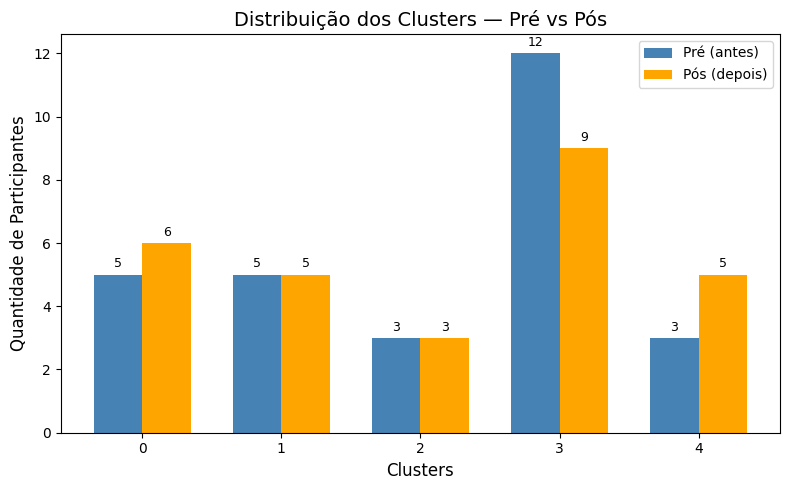

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Distribuição dos clusters no PRÉ
dist_pre = df_clusters_id["cluster"].value_counts().sort_index()

# Distribuição dos clusters no PÓS
dist_post = df_clusters_post["cluster_post"].value_counts().sort_index()

# Garantir alinhamento nos índices (0,1,2,3)
clusters = sorted(set(dist_pre.index) | set(dist_post.index))
pre_vals  = [dist_pre.get(c, 0) for c in clusters]
post_vals = [dist_post.get(c, 0) for c in clusters]

x = np.arange(len(clusters))  # posição no eixo X
largura = 0.35

fig, ax = plt.subplots(figsize=(8,5))

# Barras lado a lado
bars1 = ax.bar(x - largura/2, pre_vals, largura, label="Pré (antes)", color="steelblue")
bars2 = ax.bar(x + largura/2, post_vals, largura, label="Pós (depois)", color="orange")

# Títulos e eixos
ax.set_title("Distribuição dos Clusters — Pré vs Pós", fontsize=14)
ax.set_xlabel("Clusters", fontsize=12)
ax.set_ylabel("Quantidade de Participantes", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([str(c) for c in clusters])
ax.legend()

# Rótulos acima das barras
for bars in [bars1, bars2]:
    for bar in bars:
        altura = bar.get_height()
        ax.annotate(f'{int(altura)}',
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import pandas as pd

# Vetores
pre  = df_gain["media_pre"].dropna().values
post = df_gain["media_post"].dropna().values

# Conferência rápida (mesmo N)
n = min(len(pre), len(post))
pre  = pre[:n]
post = post[:n]

# Estatísticas
mean_pre  = np.mean(pre)
mean_post = np.mean(post)

std_pre  = np.std(pre, ddof=1)   # desvio-padrão amostral
std_post = np.std(post, ddof=1)

summary_6A = pd.DataFrame({
    "Métrica": ["Média", "Desvio-padrão", "N"],
    "Pré":     [round(mean_pre,3),  round(std_pre,3),  n],
    "Pós":     [round(mean_post,3), round(std_post,3), n]
})
print("Bloco 6A — Médias e Desvios-Padrão (Pré e Pós)")
display(summary_6A)


Bloco 6A — Médias e Desvios-Padrão (Pré e Pós)


,Métrica,Pré,Pós
0,Média,3.092,3.383
1,Desvio-padrão,0.572,0.731
2,N,28.000,28.000


In [ ]:
from scipy import stats
import pandas as pd
import numpy as np

pre  = df_gain["media_pre"].dropna().values
post = df_gain["media_post"].dropna().values
n = min(len(pre), len(post))
pre, post = pre[:n], post[:n]

diff = post - pre  # diferença pareada, usada no t pareado

W_pre,  p_pre  = stats.shapiro(pre)
W_post, p_post = stats.shapiro(post)
W_diff, p_diff = stats.shapiro(diff)

summary_6B = pd.DataFrame({
    "Amostra": ["Pré", "Pós", "Diferença (Pós - Pré)"],
    "W": [round(W_pre,3), round(W_post,3), round(W_diff,3)],
    "p-valor": [round(p_pre,3), round(p_post,3), round(p_diff,3)]
})

print("Bloco 6B — Normalidade (Shapiro-Wilk)")
display(summary_6B)

print("\nRegra prática:")
print("- Para teste t pareado, o que importa é a normalidade das DIFERENÇAS (p_diff).")
print("- Se p_diff > 0.05 → diferença aproximadamente normal → pode usar t pareado.")
print("- Caso contrário → use Wilcoxon.")


Bloco 6B — Normalidade (Shapiro-Wilk)


,Amostra,W,p-valor
0,Pré,0.973,0.674
1,Pós,0.972,0.638
2,Diferença (Pós - Pré),0.968,0.538



Regra prática:
- Para teste t pareado, o que importa é a normalidade das DIFERENÇAS (p_diff).
- Se p_diff > 0.05 → diferença aproximadamente normal → pode usar t pareado.
- Caso contrário → use Wilcoxon.


In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

pre  = df_gain["media_pre"].dropna().values
post = df_gain["media_post"].dropna().values
n = min(len(pre), len(post))
pre, post = pre[:n], post[:n]
diff = post - pre

# Normalidade da diferença
_, p_diff = stats.shapiro(diff)

if p_diff > 0.05:
    # t pareado (paramétrico)
    stat, pval = stats.ttest_rel(pre, post)
    teste = "t pareado"
    # gl = n-1
else:
    # Wilcoxon (não-paramétrico, par a par)
    stat, pval = stats.wilcoxon(pre, post, zero_method="wilcox", alternative="two-sided", correction=False, mode="auto")
    teste = "Wilcoxon (signed-rank)"

res_6C = pd.DataFrame({
    "Teste": [teste],
    "Estatística": [round(stat, 3)],
    "p-valor": [round(pval, 4)],
    "N (pares)": [n]
})

print("Bloco 6C — Teste de hipótese (automático)")
display(res_6C)

Bloco 6C — Teste de hipótese (automático)


,Teste,Estatística,p-valor,N (pares)
0,t pareado,-2.501,0.0188,28


In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

pre  = df_gain["media_pre"].dropna().values
post = df_gain["media_post"].dropna().values
n = min(len(pre), len(post))
pre, post = pre[:n], post[:n]
diff = post - pre

# Cohen's d (pareado) = média(diff) / sd(diff)
mean_diff = np.mean(diff)
sd_diff   = np.std(diff, ddof=1)
cohen_d  = mean_diff / sd_diff if sd_diff > 0 else np.nan

# Interpretação (Cohen, 1988)
if np.isfinite(cohen_d):
    absd = abs(cohen_d)
    if absd < 0.2:
        interp = "muito pequeno (quase nulo)"
    elif absd < 0.5:
        interp = "pequeno"
    elif absd < 0.8:
        interp = "médio"
    else:
        interp = "grande"
else:
    interp = "indefinido (sd da diferença = 0)"

res_6D = pd.DataFrame({
    "Métrica": ["Cohen's d (pareado)"],
    "Valor": [round(cohen_d, 3)],
    "Interpretação": [interp]
})

print("Bloco 6D — Tamanho do efeito (Cohen’s d, pareado)")
display(res_6D)

# (Opcional) r de efeito para Wilcoxon — aproximação a partir do p-valor (duas caudas)
# r = Z / sqrt(N)
# Obter Z aproximando a partir do p (two-sided): Z = norm.isf(p/2); sinal com base em mean_diff
from scipy.stats import norm

# Você pode reutilizar o p do Wilcoxon do Bloco 6C se tiver salvo; aqui recalculo:
_, p_wilcox = stats.wilcoxon(pre, post, zero_method="wilcox", alternative="two-sided", correction=False, mode="auto")
if p_wilcox > 0 and p_wilcox < 1:
    z = norm.isf(p_wilcox / 2.0)
    z = z if mean_diff >= 0 else -z
    r_effect = z / np.sqrt(n)
    res_r = pd.DataFrame({"Métrica": ["r (Wilcoxon, aprox)"], "Valor": [round(r_effect,3)]})
    print("\n(Extra) Efeito r para Wilcoxon (aprox.)")
    display(res_r)


Bloco 6D — Tamanho do efeito (Cohen’s d, pareado)


,Métrica,Valor,Interpretação
0,Cohen's d (pareado),0.473,pequeno



(Extra) Efeito r para Wilcoxon (aprox.)


,Métrica,Valor
0,"r (Wilcoxon, aprox)",0.43


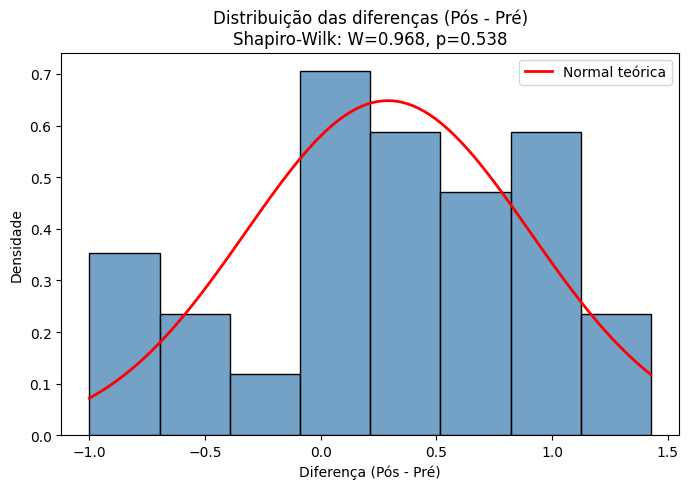

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Diferenças pós - pré
diff = df_gain["media_post"] - df_gain["media_pre"]
diff = diff.dropna()

# Teste Shapiro-Wilk
W, p_value = stats.shapiro(diff)

# Histograma
plt.figure(figsize=(7,5))
sns.histplot(diff, kde=False, stat="density", bins=8, color="steelblue")

# Curva normal teórica com mesma média e desvio
x_vals = np.linspace(diff.min(), diff.max(), 100)
normal_curve = stats.norm.pdf(x_vals, diff.mean(), diff.std(ddof=1))
plt.plot(x_vals, normal_curve, color="red", lw=2, label="Normal teórica")

# Títulos e legenda
plt.title(f"Distribuição das diferenças (Pós - Pré)\nShapiro-Wilk: W={W:.3f}, p={p_value:.3f}")
plt.xlabel("Diferença (Pós - Pré)")
plt.ylabel("Densidade")
plt.legend()

plt.tight_layout()
plt.show()


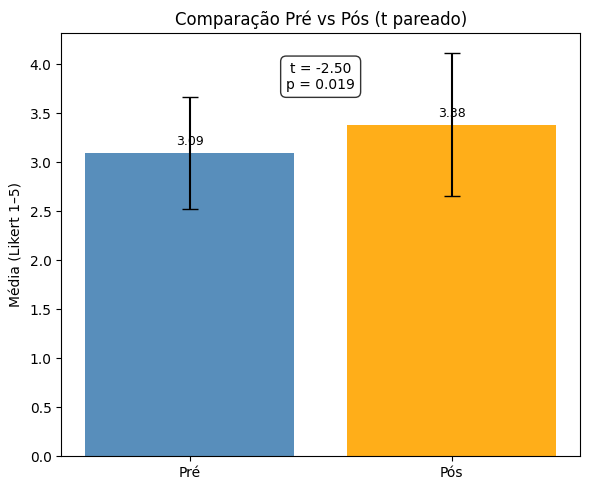

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Vetores
pre  = df_gain["media_pre"].dropna().values
post = df_gain["media_post"].dropna().values

# Médias e desvios
mean_pre, mean_post = np.mean(pre), np.mean(post)
std_pre, std_post   = np.std(pre, ddof=1), np.std(post, ddof=1)
n = len(pre)

# Teste t pareado
t_stat, p_val = stats.ttest_rel(pre, post)

# Gráfico
fig, ax = plt.subplots(figsize=(6,5))
x = np.arange(2)
means = [mean_pre, mean_post]
stds  = [std_pre, std_post]

bars = ax.bar(x, means, yerr=stds, capsize=6, color=["#4682B4","#FFA500"], alpha=0.9)
ax.set_xticks(x)
ax.set_xticklabels(["Pré", "Pós"])
ax.set_ylabel("Média (Likert 1–5)")
ax.set_title("Comparação Pré vs Pós (t pareado)")

# Anotação do p-valor
annot = f"t = {t_stat:.2f}\np = {p_val:.3f}"
ax.annotate(annot,
            xy=(0.5, max(means)+max(stds)*0.5), xycoords="data",
            ha="center", fontsize=10,
            bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="#333"))

# Rótulos nas barras
for b in bars:
    ax.text(b.get_x() + b.get_width()/2, b.get_height()+0.05,
            f"{b.get_height():.2f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


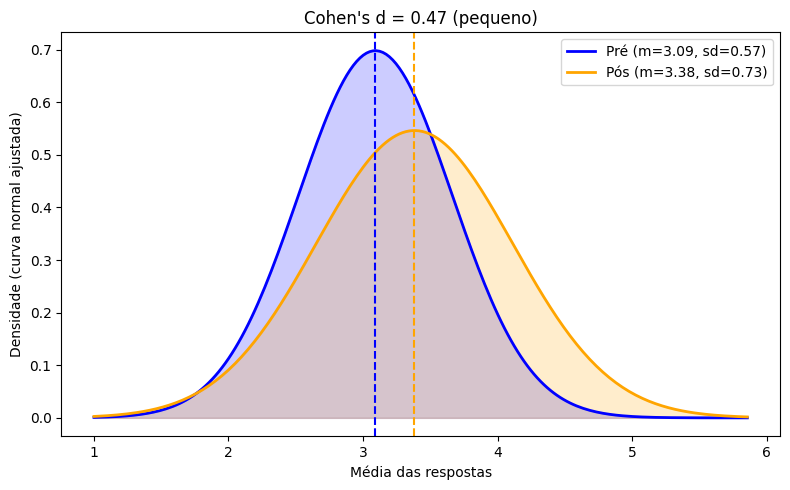

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

pre  = df_gain["media_pre"].dropna().values
post = df_gain["media_post"].dropna().values

# Médias e desvios
mean_pre, mean_post = np.mean(pre), np.mean(post)
std_pre, std_post   = np.std(pre, ddof=1), np.std(post, ddof=1)

# Cohen's d (pareado: usa sd das diferenças)
diff = post - pre
cohen_d = np.mean(diff) / np.std(diff, ddof=1)

# Interpretação
if abs(cohen_d) < 0.2:
    interp = "muito pequeno"
elif abs(cohen_d) < 0.5:
    interp = "pequeno"
elif abs(cohen_d) < 0.8:
    interp = "médio"
else:
    interp = "grande"

# Preparar curvas normais
x = np.linspace(min(pre.min(), post.min())-1, max(pre.max(), post.max())+1, 200)
pre_curve  = stats.norm.pdf(x, mean_pre, std_pre)
post_curve = stats.norm.pdf(x, mean_post, std_post)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, pre_curve, color="blue", lw=2, label=f"Pré (m={mean_pre:.2f}, sd={std_pre:.2f})")
plt.plot(x, post_curve, color="orange", lw=2, label=f"Pós (m={mean_post:.2f}, sd={std_post:.2f})")

plt.fill_between(x, pre_curve, alpha=0.2, color="blue")
plt.fill_between(x, post_curve, alpha=0.2, color="orange")

plt.axvline(mean_pre, color="blue", linestyle="--")
plt.axvline(mean_post, color="orange", linestyle="--")

plt.title(f"Cohen's d = {cohen_d:.2f} ({interp})")
plt.xlabel("Média das respostas")
plt.ylabel("Densidade (curva normal ajustada)")
plt.legend()
plt.tight_layout()
plt.show()
